# Cyber Data Analytics, CS4035
## Lab assignment 1: Fraud detection
### April 2019

### Importing data from CSV file

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

data = pd.read_csv('./data_for_student_case.csv', sep = ',')
data = data.dropna()

data.head()
data.shape
print(data.dtypes)

labels = data['simple_journal']
print("Number of non-fraud: ", np.sum(labels == 'Settled'), ", with ratio: ", np.sum(labels == 'Settled')/len(labels))
print("Number of fraud: ", np.sum(labels == 'Chargeback'), ", with ratio: ", np.sum(labels == 'Chargeback')/len(labels))
print("Number of fraud: ", np.sum(labels == 'Refused'), ", with ratio: ", np.sum(labels == 'Refused')/len(labels))

data.groupby(by = 'simple_journal').count()

txid                              int64
bookingdate                      object
issuercountrycode                object
txvariantcode                    object
bin                             float64
amount                          float64
currencycode                     object
shoppercountrycode               object
shopperinteraction               object
simple_journal                   object
cardverificationcodesupplied     object
cvcresponsecode                   int64
creationdate                     object
accountcode                      object
mail_id                          object
ip_id                            object
card_id                          object
dtype: object
Number of non-fraud:  223165 , with ratio:  0.8127888639202817
Number of fraud:  345 , with ratio:  0.0012565239085541963
Number of fraud:  51057 , with ratio:  0.18595461217116405


,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id
simple_journal,,,,,,,,,,,,,,,,
Chargeback,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345
Refused,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057,51057
Settled,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165


## Convesion of categorical data to numeric

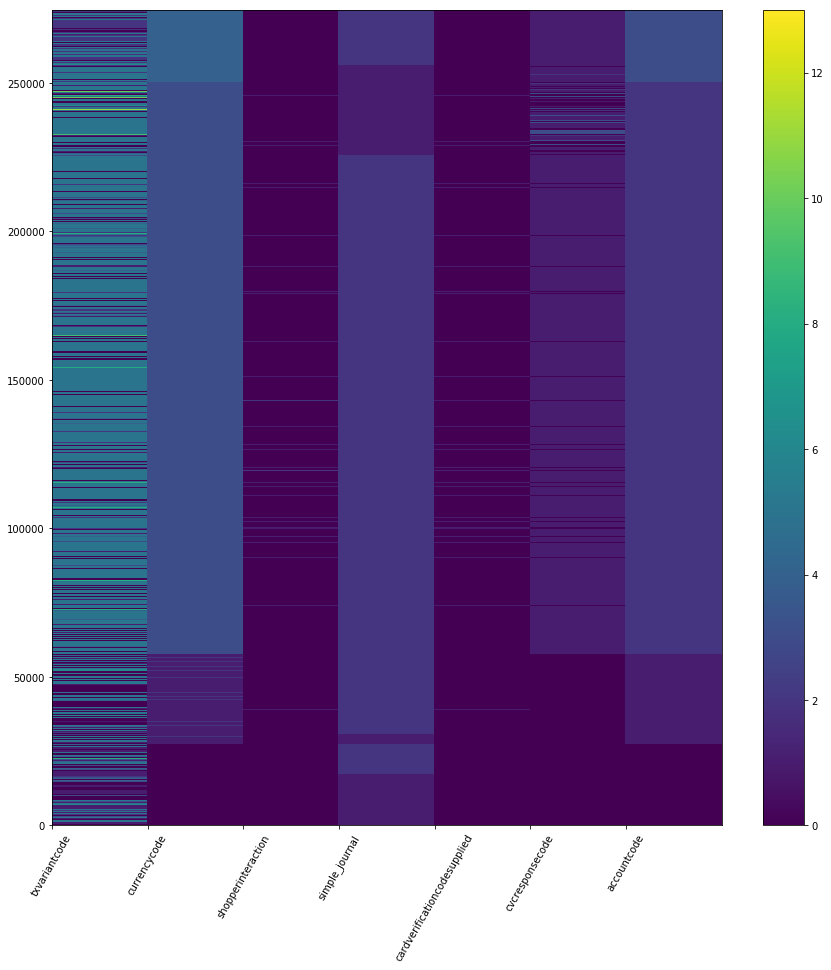

In [23]:
data_cat = data.copy(True)

data_oneHot = pd.get_dummies(data, columns = ['issuercountrycode', 'txvariantcode', 'currencycode', 'shoppercountrycode', 'shopperinteraction', 'cardverificationcodesupplied', 'accountcode'])

char_cols = data.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    data[c], label_mapping[c] = pd.factorize(data[c])

labels = ['txvariantcode', 'currencycode', 'shopperinteraction', 'simple_journal',  
          'cardverificationcodesupplied', 'cvcresponsecode', 'accountcode']

plt.figure(figsize = (15,15))
plt.pcolor(data[labels])
plt.xticks(np.arange(len(labels)), labels, rotation = 60)
plt.colorbar()

## Dummy classification

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = data.drop('simple_journal', axis = 1).values
y = data['simple_journal'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

print(X_train.shape)
print(X_test.shape)

(247110, 16)
(27457, 16)


In [25]:
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7334377390100885

### Aggregated values per card id

(234814, 6)


Text(0.5, 1.0, 'Fraud')

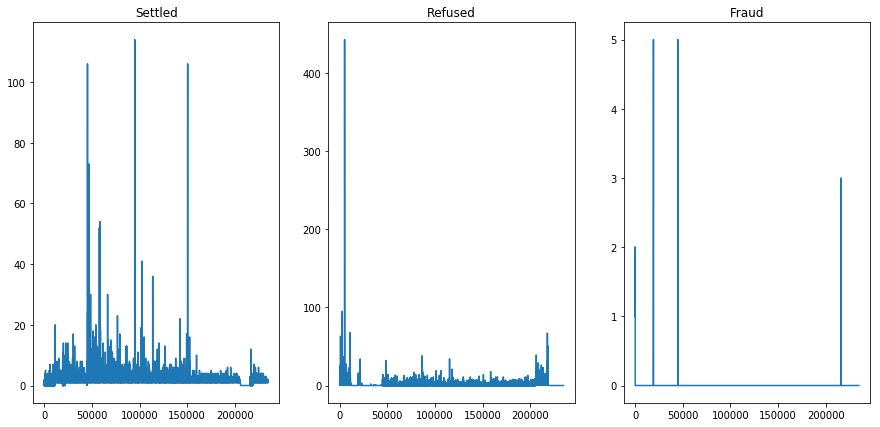

In [56]:
data_agg = data[['card_id', 'simple_journal', 'amount']]

dd = pd.get_dummies(data_agg, columns = ['simple_journal'])

dd['sum_fraud'] = dd['amount'] * dd['simple_journal_Chargeback']
dd['sum_ref'] = dd['amount'] * dd['simple_journal_Refused']
dd['sum_OK'] = dd['amount'] * dd['simple_journal_Settled']

dd_user = dd.groupby(by = 'card_id', sort = False).agg({
    'simple_journal_Settled' : sum,
    'sum_OK' : 'mean',
    'simple_journal_Refused' : sum,
    'sum_ref' : 'mean',
    'simple_journal_Chargeback' : sum,
    'sum_fraud' : 'mean'
})

print(dd_user.values.shape)

# Visualizations
f, ax = plt.subplots(1, 3, figsize = (15,7))
# p1 = plt.bar(np.arange(len(dd_user.values)), dd_user.values[:, 0])
# p2 = plt.bar(np.arange(len(dd_user.values)), dd_user.values[:, 2], bottom = dd_user.values[:, 0])
# p3 = plt.bar(np.arange(len(dd_user.values)), dd_user.values[:, 4], bottom = dd_user.values[:, 0] + dd_user.values[:, 2])
ax[0].plot(dd_user.values[:, 0])
ax[0].set_title("Settled")
ax[1].plot(dd_user.values[:, 2])
ax[1].set_title("Refused")
ax[2].plot(dd_user.values[:, 4])
ax[2].set_title("Fraud")

In [43]:
test = data['bookingdate'].str.extract('(....-..-..)', expand=True)
test
tt = test[0].unique().sort()


None


### Visualizations

Text(0, 0.5, 'bin')

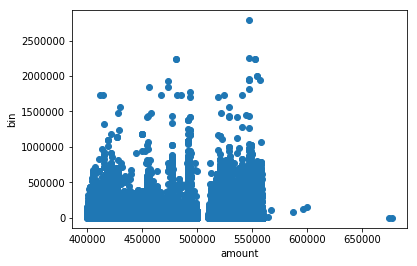

In [33]:
dd = data.values[:, 4:6].astype(float)
plt.scatter(dd[:,0], dd[:,1])
plt.xlabel('amount')
plt.ylabel('bin')

Text(0, 0.5, 'mean amount per group')

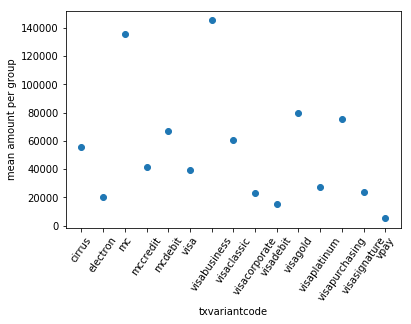

In [80]:
code = data[['txvariantcode', 'amount']].groupby(['txvariantcode']).mean()
code.values
labels = code.index.values
plt.scatter(np.arange(len(code.values)), code.values)
plt.xticks(np.arange(len(code.values)), labels, rotation = '55')
plt.xlabel('txvariantcode')
plt.ylabel('mean amount per group')

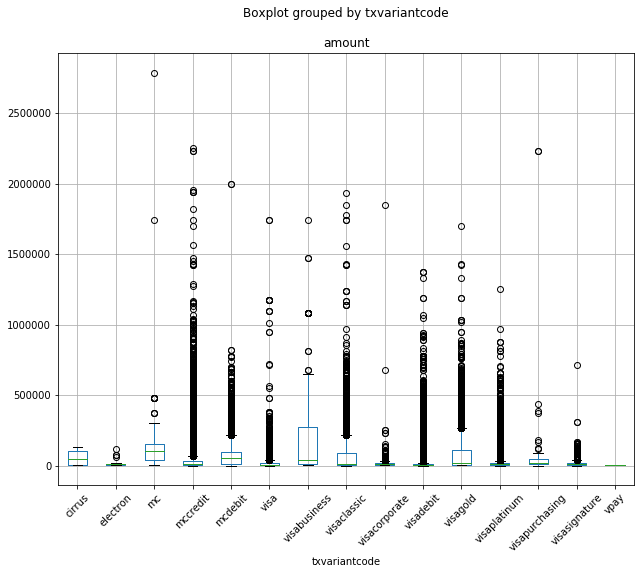

In [12]:
data.boxplot(column = 'amount', by = 'txvariantcode', figsize = (10, 8), rot = '45')

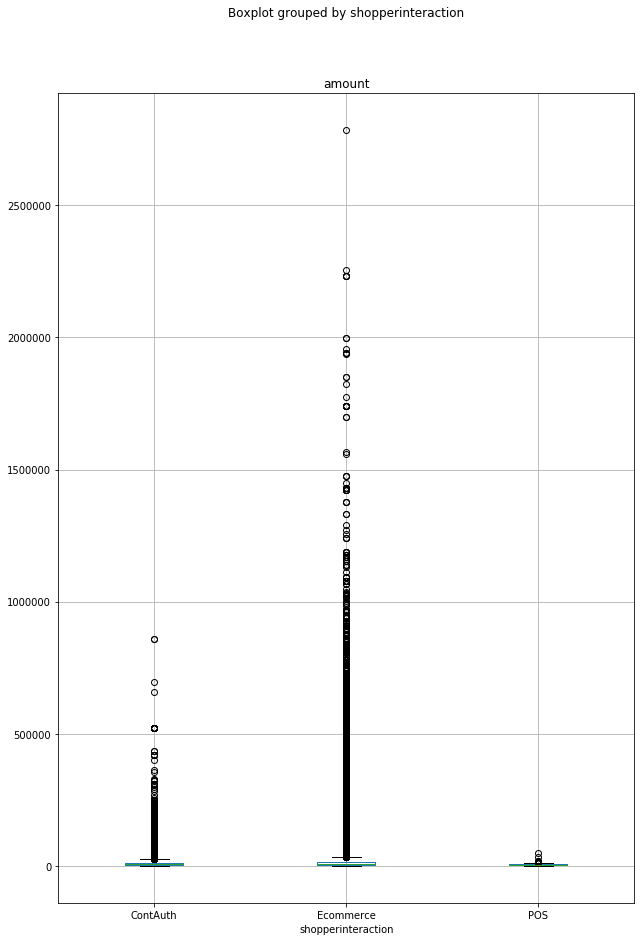

In [5]:
data.boxplot(column = ['amount'], by = 'shopperinteraction', figsize = (10,15))

### Number of IP addresses per card id
#### The more addresses the more suspicious the transactions are

In [25]:
data[['card_id', 'ip_id']].groupby('card_id').nunique().sort_values(by = 'ip_id', ascending = False)

,card_id,ip_id
card_id,,
card183189,1,25
card267365,1,25
card11998,1,23
card210128,1,22
card18592,1,20
card170983,1,16
card14995,1,16
card247861,1,15
card246133,1,13
